In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
!unzip /content/chest-xray-pneumonia.zip

In [1]:
import glob
import random
import cv2
import os
from pathlib import Path
from keras import layers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 32
resize = (224, 224)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        featurewise_std_normalization=True) 

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
        '/content/chest_xray/train', 
        target_size=resize, 
        batch_size=batch_size,
        class_mode='binary')  

validation_generator = validation_datagen.flow_from_directory(
        '/content/chest_xray/val',
        target_size=resize,
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/chest_xray/test',
        target_size=resize,
        batch_size=batch_size,
        class_mode='binary')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


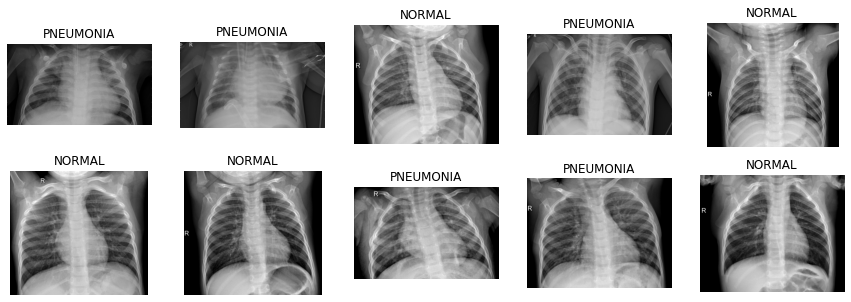

In [3]:
w = 10
h = 10
fig = plt.figure(figsize=(15,5))
columns = 5
rows = 2
fielName = "/content/chest_xray/train"

for i in range(0, columns*rows):
  index = random.randint(0,1)
  folderName = os.path.join((fielName), os.listdir(fielName)[index])
  img = cv2.imread(folderName+'/'+(os.listdir(os.path.join((fielName), os.listdir(fielName)[index]))[i]))
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(os.path.basename(folderName))

plt.show()

In [4]:
size = 224

#   model

In [5]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding="same", input_shape=(size,size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (5,5), padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))

model.add(layers.Conv2D(128, (7,7), padding="same"))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        2

In [7]:
model.compile(optimizer="adam", metrics="accuracy", loss="binary_crossentropy")

In [8]:
model.fit(train_generator, epochs=5, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
163/163 [==============================] - 116s 684ms/step - loss: 0.4209 - accuracy: 0.8204 - val_loss: 1.7963 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 110s 676ms/step - loss: 0.2981 - accuracy: 0.8763 - val_loss: 1.8631 - val_accuracy: 0.5000
Epoch 3/5
163/163 [==============================] - 108s 665ms/step - loss: 0.2571 - accuracy: 0.8955 - val_loss: 1.2694 - val_accuracy: 0.5000
Epoch 4/5
163/163 [==============================] - 112s 687ms/step - loss: 0.2448 - accuracy: 0.9007 - val_loss: 1.4709 - val_accuracy: 0.5000
Epoch 5/5
163/163 [==============================] - 110s 672ms/step - loss: 0.2401 - accuracy: 0.8999 - val_loss: 2.2366 - val_accuracy: 0.5000


In [9]:
model.evaluate(test_generator) 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


20/20 [==============================] - 12s 590ms/step - loss: 1.6140 - accuracy: 0.6250


[1.614027500152588, 0.625]